# Analyze the variation in ratings of critics and audience
- based on the variation in ratings find out the highly dicisive and most balanced movies

In [1]:
import pandas as pd
import os
import csv
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib

In [2]:
current_path =os.path.expanduser('~')
current_path =os.path.join(current_path,'Final_Exam')
input_path = os.path.join(current_path,'Data')
output_path = os.path.join(current_path,'Analysis')
output_path = os.path.join(output_path,'Analysis_1')

In [3]:
df_movies = pd.read_csv( input_path + '\\movies.csv', encoding='ISO-8859-1')         #read movies csv file into a dataframe
df_movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [ ]:
#df_movies.shape

In [4]:
df_ratings = pd.read_csv( input_path + '\\ratings.csv', encoding='ISO-8859-1')
#df_ratings.shape

In [5]:
df_ratings.head()

,userId,movieId,rating,timestamp
0,1,2,3.5,1112486027
1,1,29,3.5,1112484676
2,1,32,3.5,1112484819
3,1,47,3.5,1112484727
4,1,50,3.5,1112484580


In [6]:
df_critics_rating = pd.read_csv( input_path + '\\movies_1.csv', encoding='ISO-8859-1')
df_critics_rating.head()

,id,title,imdbID,spanishTitle,imdbPictureURL,year,rtID,rtAllCriticsRating,rtAllCriticsNumReviews,rtAllCriticsNumFresh,...,rtAllCriticsScore,rtTopCriticsRating,rtTopCriticsNumReviews,rtTopCriticsNumFresh,rtTopCriticsNumRotten,rtTopCriticsScore,rtAudienceRating,rtAudienceNumRatings,rtAudienceScore,rtPictureURL
0,1,Toy story,114709,Toy story (juguetes),http://ia.media-imdb.com/images/M/MV5BMTMwNDU0...,1995,toy_story,9,73,73,...,100,8.5,17,17,0,100,3.7,102338,81,http://content7.flixster.com/movie/10/93/63/10...
1,2,Jumanji,113497,Jumanji,http://ia.media-imdb.com/images/M/MV5BMzM5NjE1...,1995,1068044-jumanji,5.6,28,13,...,46,5.8,5,2,3,40,3.2,44587,61,http://content8.flixster.com/movie/56/79/73/56...
2,3,Grumpy Old Men,107050,Dos viejos gruñones,http://ia.media-imdb.com/images/M/MV5BMTI5MTgy...,1993,grumpy_old_men,5.9,36,24,...,66,7,6,5,1,83,3.2,10489,66,http://content6.flixster.com/movie/25/60/25602...
3,4,Waiting to Exhale,114885,Esperando un respiro,http://ia.media-imdb.com/images/M/MV5BMTczMTMy...,1995,waiting_to_exhale,5.6,25,14,...,56,5.5,11,5,6,45,3.3,5666,79,http://content9.flixster.com/movie/10/94/17/10...
4,5,Father of the Bride Part II,113041,Vuelve el padre de la novia (Ahora también abu...,http://ia.media-imdb.com/images/M/MV5BMTg1NDc2...,1995,father_of_the_bride_part_ii,5.3,19,9,...,47,5.4,5,1,4,20,3,13761,64,http://content8.flixster.com/movie/25/54/25542...


- cleaning the data of input file. Removing all records having '\\N' as values. 
- converting ratings and number of critics to float so that can be used comparison

In [7]:
df_critics_rating = df_critics_rating.filter(['id','rtAllCriticsRating', 'rtAllCriticsNumReviews'], axis=1)
df_critics_rating = df_critics_rating[df_critics_rating.rtAllCriticsRating.apply(lambda x: x != '\\N')]
df_critics_rating['rtAllCriticsNumReviews'] = df_critics_rating.rtAllCriticsNumReviews.astype(float)
df_critics_rating['rtAllCriticsRating'] = df_critics_rating.rtAllCriticsRating.astype(float)
#df_critics_rating = df_critics_rating[df_critics_rating.rtAllCriticsRating = 0]
#df_critics_rating.head()
#df_critics_rating.dtypes

- Taking into considertaion those movies which have rated by atleast 30 critics

In [8]:
df_x = df_critics_rating[(df_critics_rating['rtAllCriticsNumReviews'])> 30.0]
#df_x.dtypes

- renaming the column for use in join later
- calculating the ratings by critics to equivalent of 5 

In [9]:
df_x = df_x.rename(columns={'id':'movieId'})
df_x['rtAllCriticsRating'] =df_x['rtAllCriticsRating']*0.5 #calculate the equivalent rating from 5
df_x['rtAllCriticsNumReviews'] = df_x.rtAllCriticsNumReviews.astype(int)
df_x.head()

,movieId,rtAllCriticsRating,rtAllCriticsNumReviews
0,1,4.50,73
2,3,2.95,36
5,6,3.85,58
6,7,3.70,31
8,9,2.60,32


# Weighted Mean formula used for calculating weighted rating of users 
- weighted rating = (v/(v+m))R+(m/(v+m))C
- where:
- R = average for the movie (mean) = (Rating)
- v = number of votes for the movie = (votes)
- m = minimum votes required to be listed in the Top 50 (currently 500)
- C = the mean vote across the whole report 

- calculating value of R

In [10]:
df_avg_rating = df_ratings.groupby('movieId').mean()
df_avg_rating = df_avg_rating[['rating']]
df_avg_rating = df_avg_rating.sort_values(by='rating', ascending = False)
df_avg_rating = df_avg_rating.reset_index()
df_avg_rating.head()

,movieId,rating
0,95517,5.0
1,105846,5.0
2,89133,5.0
3,105187,5.0
4,105191,5.0


- calculating value of C

In [11]:
c = df_avg_rating['rating'].mean()  # the mean vote across the whole report

- calculating total no of votes/ratings for each , V

In [12]:
df_counts = df_ratings.groupby('movieId').count()
df_counts = df_counts[['userId']]
df_counts = df_counts.sort_values(by='userId', ascending = False)
df_counts = df_counts.reset_index()
#df_counts.shape

- assuming 500 as threshhold for minimum votes to be listed in top 10
- considering movies which have been rated by alteast 500 users

In [13]:
df_counts = df_counts[df_counts['userId'] > 500]  #considering 500 as threshhold for minimum votes to be listed in top 10
df_counts.head()

,movieId,userId
0,296,67310
1,356,66172
2,318,63366
3,593,63299
4,480,59715


In [14]:
df_result = pd.merge(df_avg_rating, df_counts, on = 'movieId')
df_result.head()

,movieId,rating,userId
0,318,4.446990,63366
1,858,4.364732,41355
2,50,4.334372,47006
3,527,4.310175,50054
4,1221,4.275641,27398


- Calculating weighted mean rating of users

In [15]:
df_result['weighted_rating'] =((df_result['userId']/(df_result['userId']+500))*df_result['rating'] + (500/(df_result['userId']+500))*c)
df_result = df_result.sort_values(by='weighted_rating', ascending = 'False')
df_result.head()

,movieId,rating,userId,weighted_rating
4476,3593,1.600554,3973,1.771876
4482,4775,1.124088,685,1.971814
4481,6587,1.164051,701,1.983847
4463,1760,1.770316,2658,1.986099
4442,1556,1.912317,5326,2.017096


- Extracting year from movie title

In [16]:
df_movies['year'] = df_movies.title.apply(lambda x : int(x[-5:-1]) if x[-5:-1].isdigit() else 1900)  # extract year of movie from title
df_movies.sort_values(by='year', ascending =  False).head()

,movieId,title,genres,year
26487,127122,Last Days in the Desert (2015),Adventure|Drama,2015
27122,130490,Insurgent (2015),Action|Romance|Sci-Fi,2015
26496,127140,Sleeping with Other People (2015),Comedy,2015
26495,127138,Ten Thousand Saints (2015),Comedy|Drama,2015
26494,127136,True Story (2015),Drama|Mystery|Thriller,2015


- merging ratings and movie titles

In [17]:
df_result = pd.merge(df_result, df_movies, on='movieId')
df_result.head()

,movieId,rating,userId,weighted_rating,title,genres,year
0,3593,1.600554,3973,1.771876,Battlefield Earth (2000),Action|Sci-Fi,2000
1,4775,1.124088,685,1.971814,Glitter (2001),Drama|Musical|Romance,2001
2,6587,1.164051,701,1.983847,Gigli (2003),Comedy|Crime|Romance,2003
3,1760,1.770316,2658,1.986099,Spice World (1997),Comedy,1997
4,1556,1.912317,5326,2.017096,Speed 2: Cruise Control (1997),Action|Romance|Thriller,1997


In [18]:
df_result = df_result.drop(['userId','rating'] , axis = 1)

In [19]:
df_result = df_result.rename(columns = {'weighted_rating':'user_rating'})
df_result.head()

,movieId,user_rating,title,genres,year
0,3593,1.771876,Battlefield Earth (2000),Action|Sci-Fi,2000
1,4775,1.971814,Glitter (2001),Drama|Musical|Romance,2001
2,6587,1.983847,Gigli (2003),Comedy|Crime|Romance,2003
3,1760,1.986099,Spice World (1997),Comedy,1997
4,1556,2.017096,Speed 2: Cruise Control (1997),Action|Romance|Thriller,1997


- merging dataframes with user ratings and critics rating

In [20]:
df_output = pd.merge(df_result, df_x, on='movieId' )
df_output = df_output.sort_values(by='year')
df_output = df_output.rename(columns = {'rtAllCriticsRating':'critics_rating'})
df_output.head()

,movieId,user_rating,title,genres,year,critics_rating,rtAllCriticsNumReviews
1941,6987,3.705106,"Cabinet of Dr. Caligari, The (Cabinet des Dr. ...",Crime|Fantasy|Horror,1920,4.45,34
1840,3310,3.659605,"Kid, The (1921)",Comedy|Drama,1921,3.45,41
2121,1348,3.807852,"Nosferatu (Nosferatu, eine Symphonie des Graue...",Horror,1922,4.45,47
1439,6986,3.481502,Ben-Hur: A Tale of the Christ (1925),Adventure|Drama,1925,3.90,33
2312,3022,3.973789,"General, The (1926)",Comedy|War,1926,4.45,38


In [21]:
#df_output.tail()

In [23]:
#df_output.to_csv(output_path + '\\Analysis_1_Output.csv', index = False)
df_output.to_csv(input_path + '\\User_Rating.csv', index = False)

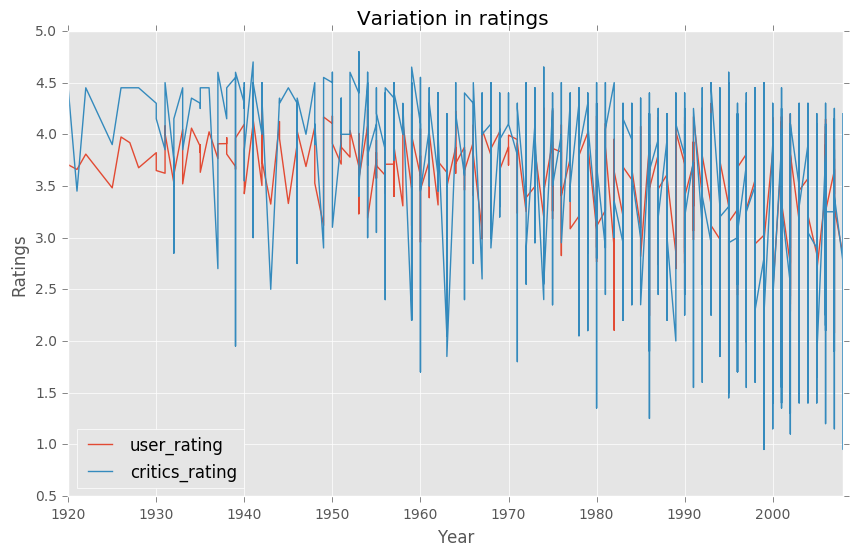

In [24]:
matplotlib.style.use('ggplot')
#plt.figure(figsize= (8,8))
ax =df_output.plot(x='year', y=['user_rating','critics_rating'] , figsize=(10,6), title='Variation in ratings ')
ax.set_xlabel('Year')
ax.set_ylabel('Ratings')
plt.savefig(output_path + '\\ratings_variation.jpeg')

In [25]:
df_output1 = df_output[['movieId','title','user_rating','critics_rating']]
df_output1['title'] = df_output.title.apply(lambda x : x[:-6])
df_output1.head()

C:\Users\jaina\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


,movieId,title,user_rating,critics_rating
1941,6987,"Cabinet of Dr. Caligari, The (Cabinet des Dr. ...",3.705106,4.45
1840,3310,"Kid, The",3.659605,3.45
2121,1348,"Nosferatu (Nosferatu, eine Symphonie des Graue...",3.807852,4.45
1439,6986,Ben-Hur: A Tale of the Christ,3.481502,3.90
2312,3022,"General, The",3.973789,4.45


In [26]:
df_output1['difference'] = df_output1['critics_rating'] - df_output1['user_rating']
df_output1.head()

C:\Users\jaina\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


,movieId,title,user_rating,critics_rating,difference
1941,6987,"Cabinet of Dr. Caligari, The (Cabinet des Dr. ...",3.705106,4.45,0.744894
1840,3310,"Kid, The",3.659605,3.45,-0.209605
2121,1348,"Nosferatu (Nosferatu, eine Symphonie des Graue...",3.807852,4.45,0.642148
1439,6986,Ben-Hur: A Tale of the Christ,3.481502,3.90,0.418498
2312,3022,"General, The",3.973789,4.45,0.476211


In [27]:
df_output1['difference'] = df_output1.difference.apply(lambda x : x if x > 0 else (x*-1))  # extract year of movie from title
df_output1 = df_output1.sort_values(by='difference' , ascending= False)

C:\Users\jaina\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


- movies that were highly divisive

In [28]:
divisive_movies = df_output1.head()
divisive_movies

,movieId,title,user_rating,critics_rating,difference
1328,6978,Slacker,3.436563,1.55,1.886563
96,1388,Jaws 2,2.638892,4.40,1.761108
664,2769,"Yards, The",3.131329,1.40,1.731329
485,53207,88 Minutes,3.023138,1.30,1.723138
1848,927,"Women, The",3.661304,1.95,1.711304


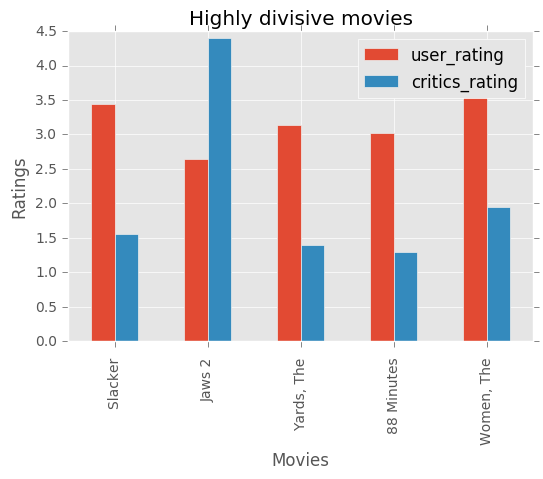

In [32]:
ax = divisive_movies.plot.bar(x='title', y=['user_rating', 'critics_rating'],title='Highly divisive movies')
ax.set_xlabel('Movies')
ax.set_ylabel('Ratings')
plt.savefig(output_path + '\\divisive_movies.jpeg')

- movies that maintained balance between user and critics.

In [30]:
balanced_movies  = df_output1.tail()

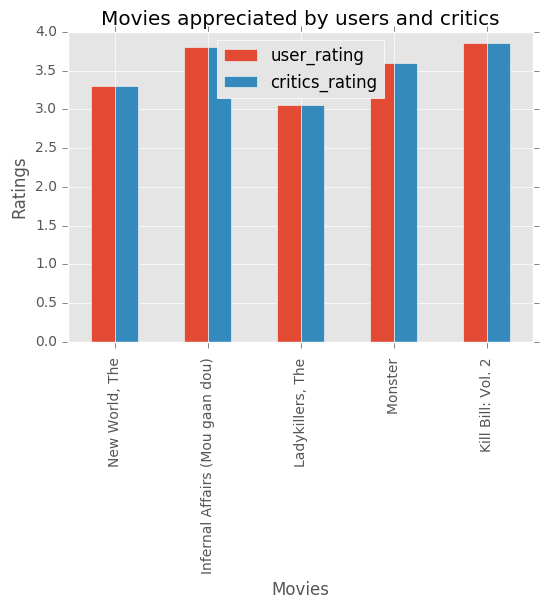

In [34]:
ax1 = balanced_movies.plot.bar(x='title', y=['user_rating', 'critics_rating'] , title = 'Movies appreciated by users and critics')
ax1.set_xlabel('Movies')
ax1.set_ylabel('Ratings')
plt.savefig(output_path + '\\balanced_movies.jpeg')